In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys,os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.getcwd(), '../'))
# from hardware.slm import SLM
from hardware.camera import NITCam
from hardware.waveshaper import Waveshaper
from hardware.yokogawa_osa import YokogawaOSA


In [3]:
from RsInstrument import *
RsInstrument.assert_minimum_version('1.14.0')

In [4]:
resource_string = 'TCPIP::192.168.1.25::INSTR'
instr = RsInstrument(resource_string, True, False)

idn = instr.query_str('*IDN?')
print(f'Connected to: {idn}')

Connected to: Rohde&Schwarz,RTA4004US,1335.7700k04/103474,01.700


Binary waveform transfer elapsed time: 1.831sec


Text(0.5, 1.0, 'Binary waveform')

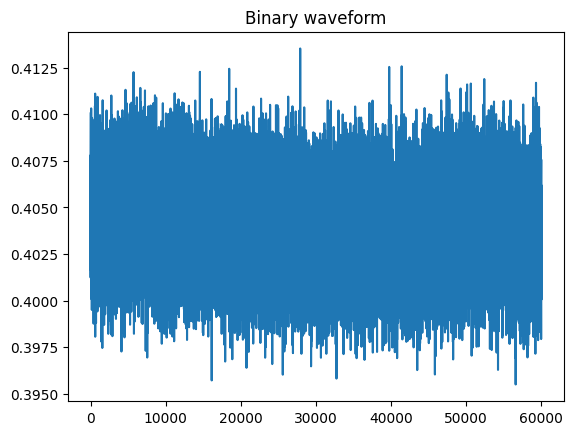

In [6]:
from time import time
rta = RsInstrument.from_existing_session(instr)

start = time()
rta.write_str("FORMat:DATA REAL,32")
rta.bin_float_numbers_format = BinFloatFormat.Single_4bytes_swapped
rta.data_chunk_size = 100000  # transfer in blocks of 100k bytes (default)
data_bin = rta.query_bin_or_ascii_float_list("CHAN1:DATA?")

print(f'Binary waveform transfer elapsed time: {time() - start:.3f}sec')

plt.figure(1)
plt.plot(data_bin)
plt.title('Binary waveform')

In [9]:
# check data_bin type
print(type(data_bin[1]))

<class 'float'>


In [10]:
print(rta.query_str("TIMebase:RANGe?"))

2.40E-05


In [11]:
print(rta.query_str("TIMebase:POSition?"))

4.0000E-08


StatusException: 'TCPIP0::192.168.1.25::inst0::INSTR': Query 'MEASure:VAVerage:VALue? CHAN1' - VISA Timeout error occurred (10000 milliseconds) and ... Instrument error detected: -113,"Undefined header"